In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Open ai introductinoi

In [1]:
import gym

In [44]:
env = gym.make('MsPacman-v0')

In [45]:
# the environemnt is initialised by reset method
obs = env.reset()

In [46]:
# observation vary depending on the nevironemnt
# in this case it is an RGB image represented as a 3D nUmpy array
# of shape [width, height, channels]

obs.shape

(210, 160, 3)

In [47]:
# an environemnt can be visualized by calling its render() method
# in this examplewe will set the mode="rgb_array"

img = env.render(mode="rgb_array")


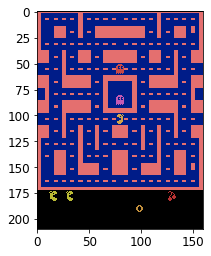

In [48]:
from IPython import display
%matplotlib inline
plt.figure(figsize=(5,4))
# for i in range(25):
#     plt.imshow(img)
#     display.display(plt.gcf())    
#     display.clear_output(wait=True)

In [49]:
(img == obs).all()

True

In [2]:
# helper function to plot th eenvironment
def plot_environment(env, figsize=(5,4)):
    plt.close()
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [51]:
env.action_space
# Discrete(9) means that the possible actions are integers 0 through 8, which represents the 9 possible positions of the joystick (0=center, 1=up, 2=right, 3=left, 4=down, 5=upper-right, 6=upper-left, 7=lower-right, 8=lower-left).

Discrete(9)

In [52]:
env.reset()
for step in range(110):
    env.step(3)
for step in range(40):
    env.step(8)

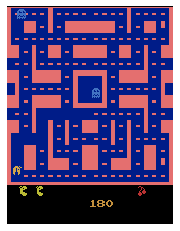

In [53]:
#plot_environment(env)

In [54]:
# the step function
obs, reward , done, info =env.step(0)

In [55]:
obs.shape

(210, 160, 3)

In [56]:
reward

0.0

In [57]:
done
# when game is over done returns true

False

In [58]:
info
# its an environemtn specific dictionary that can provide some extra info about the
# internal state of environment,

{'ale.lives': 3}

In [59]:
# playing one full game with 3 lives
frames = []
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()

for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if done:
        break

In [2]:
# to show the animation
from IPython import display
%matplotlib inline
def update_scene(num,frames,patch):
    patch.set_data(frames[num])
    return patch

def plot_animation(frames, repeat=False, interval=40):
    plt.close()
    fig = plt.figure()
    for f in frames:
        plt.imshow(f)
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)

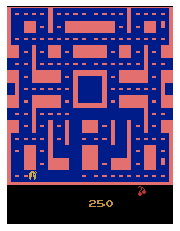

In [61]:
#plot_animation(frames)

In [62]:
env.close()

## Cartpole rendering

In [63]:
# trying a differne tpproach for rendering 
# answer taken from
# https://stackoverflow.com/questions/52726475/display-openai-gym-in-jupyter-notebook-only

In [4]:
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

In [5]:
env = gym.make('CartPole-v0')
obs = env.reset()

In [66]:
obs

array([ 0.01911864,  0.00549671, -0.01746714,  0.00916598])

In [21]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering=True
except Exception:
    openai_cart_pole_rendering=False

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        return env.render(mode="rgb_array")
    else:
        # rendering forcart pole environment
        # so badass ageron
        print("self rendering")
        img_w = 600
        img_h = 400
        cart_w = img_w //12
        cart_h = img_h //15
        pole_len = img_h //3.5
        ple_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255,255,255)
        cart_col = 0x000000
        pole_col = 0x669acc
        
        pos,vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x, cart_y - cart_h // 2, top_pole_x,top_pole_y ), fill=pole_col, width=pole_w)
        draw.line((cart_x, cart_y - cart_h//2, top_pole_x, top_pole_y ), fill=pole_col, width=pole_w)
        return np.array(img)

def plot_cart_pole(env,obs):
    plt.close()
    image = render_cart_pole(env, obs)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

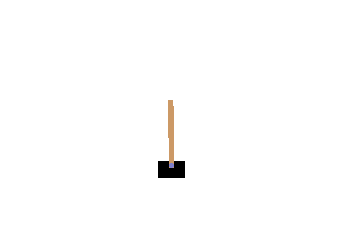

In [68]:
#plot_cart_pole(env, obs)

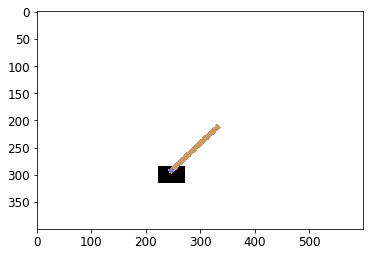

In [69]:
# the other way of rendering cartpole

for i in range(25):
   plt.imshow(env.render(mode='rgb_array'))
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   env.step(env.action_space.sample()) # take a random action

# doesntwork that well because it leaves a dead kernel 
# when we close the other window
# so dont close

In [70]:
env.action_space

Discrete(2)

(-0.5, 599.5, 399.5, -0.5)

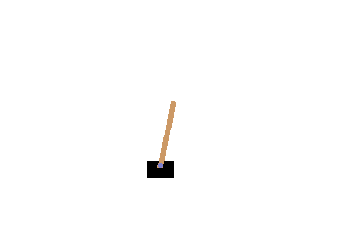

In [71]:
# for cartpole each observation is a 1D array containing 4 floats
# representing the carts horizontal position, angle of pole and the horizontal and angular velocity

# to use render to return image as anarray we can use
# env.render("rgb_array")

# cartpole has only two possible actions accelerate towards left or towards right
# accelerating left till pole falls
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

plt.close()
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

# notice that the game fails when it tilts toot muc
# and not when it actually falls

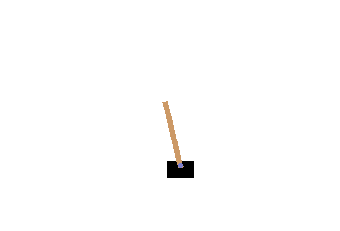

In [72]:
# lets pushto right
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break
#plot_cart_pole(env, obs)

### A simple policy
If tilting to left push right otherwise left

In [73]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env,obs)
    frames.append(img)
#     plt.imshow(img)
#     display.display(plt.gcf())    
#     display.clear_output(wait=True)
    # hard coded policy
    position, velocity, angle, angular_velocity = obs
    if angle<0:
        action = 0
    else:
        action =1
    
    obs, reward, done , info = env.step(action)
    if done:
        break

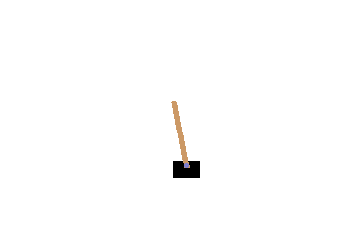

In [74]:
# plot_animation(frames)
#system is unstable

In [7]:
# lets create a neral network that will take observation as inputs and output the action to take for
# each observation. To choose an action the network will first estimate
# a probability for each action then select an action randomly according to etimated probabilities
# in case of cart pole environment
# there are two action left or right so we onyl need one output neuton
# it will output a p probability of p and 1 - p will be the probability for the right

import tensorflow as tf

# specify the network architechture
n_inputs = 4 # == env.observation_space.shape[0]
n_hidden = 4 # it a simple task, we dont need more than this
n_outputs = 1 # only outputs the probability of accelerating left
initializer = tf.variance_scaling_initializer()

# build the network
X = tf.placeholder(tf.float32, shape=[None,n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                         kernel_initializer = initializer)
outputs = tf.layers.dense(hidden, n_outputs, activation=tf.nn.elu,
                          kernel_initializer=initializer)
# if there were more twopossible actions we would have used softmax

# 3 select a random action based on estimated probailities
p_left_and_right = tf.concat(axis=1, values=[outputs, 1- outputs])
# print(outputs)
# print(p_left_and_right)
# print("log: ", tf.log(p_left_and_right))

"""
Lastly, we call the multinomial() function to pick a random action. This func‐
tion independently samples one (or more) integers, given the log probability of
each integer. For example, if you call it with the array [np.log(0.5),
np.log(0.2), np.log(0.3)] and with num_samples=5, then it will output five
integers, each of which will have a 50% probability of being 0, 20% of being 1,
and 30% of being 2. In our case we just need one integer representing the action
to take. Since the outputs tensor only contains the probability of going left, we
must first concatenate 1-outputs to it to have a tensor containing the probability
of both left and right actions. Note that if there were more than two possible
actions, the neural network would have to output one probability per action so
you would not need the concatenation step
"""

action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

init = tf.global_variables_initializer()


Tensor("dense_3/Elu:0", shape=(?, 1), dtype=float32)
Tensor("concat_1:0", shape=(?, 2), dtype=float32)
log:  Tensor("Log_2:0", shape=(?, 2), dtype=float32)


"\nin thsi particular env, the apst actions and observation can be safely ignored\nsince each observation contains the environment full state. If there were some hidden state\nthen you may need to consider past actions and observations in order to try ot\ninfer the hidden state of the environemtn for example if environment only reveealed the position and not the velocit\nwe would have to consider past and presnt.\n\nanother exampleis if observations are noisy\n\nwe are picking one random action \nYou may wonder why we are picking a random action \nbased on the probability given by the policy network,\nrather than just picking the action with the highest probability. \nThis approach lets the agent find the right balance between exploring new actions and exploiting the actions \nthat are known to work well. \nHere's an analogy: suppose you go to a restaurant for the first time, \nand all the dishes look equally appealing so you randomly pick one. If it turns out to be good, you can incre

In [77]:
# randomly playing onegame
# without training the network

n_max_steps = 1000
frames = []
with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1,n_inputs )})
        # this line choses the action with most probability at 0,0
        
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break
env.close()

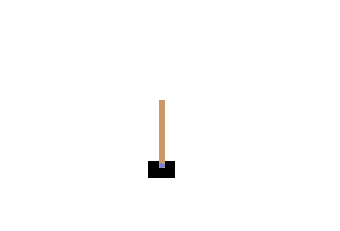

In [78]:
#plot_animation(frames)

In [79]:
# training theneural network

import tensorflow as tf
import numpy as np

tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

n_inputs = 4
n_hidden = 4
n_outputs = 1

learning_rate = 0.01

initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32,shape=[None, n_inputs])
y = tf.placeholder(tf.float32, shape=[None, n_outputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer )
logits = tf.layers.dense(hidden,n_outputs)
outputs =tf.nn.sigmoid(logits)
# probability of 0 is left

p_left_and_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)
# wtf is this p_left_and_right
# it is the combined arraay of output and 1 - ouput

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [80]:
n_environments = 10
n_iterations = 1000

envs = [gym.make("CartPole-v0") for _ in range(n_environments)]
observations = [env.reset() for env in envs]

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        target_probas = np.array([([1.] if obs[2] < 0 else [0.]) for obs in observations]) 
        # if angle<0 we want proba(left)=1., or else proba(left)=0.
        action_val, _ = sess.run([action, training_op], feed_dict={X: np.array(observations), y: target_probas})
        for env_index, env in enumerate(envs):
            obs, reward, done, info = env.step(action_val[env_index][0])
            observations[env_index] = obs if not done else env.reset()
    saver.save(sess, "./my_policy_net_basic.ckpt")

for env in envs:
    env.close()

In [19]:
def render_policy_net(model_path, aciton, X, n_max_steps=1000):
    frames = []
    env = gym.make("CartPole-v0")
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X:obs.reshape(1, n_inputs )})
            obs, reward, done, info = env.step(action_val[0][0])
            if done:
                break
    env.close()
    return frames
    

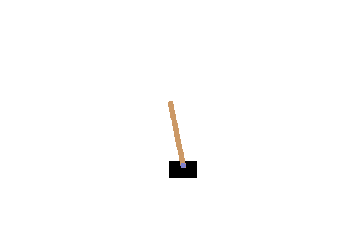

In [82]:
frames =render_policy_net("./my_policy_net_basic.ckpt", action, X)
#plot_animation(frames)

### Policy gradients

In [9]:
"""
we need to define the target probabilities y
If an action is good we must increaseits probability
and if its bad then decrease its probability. But how do we know if
an action is good or bad
The problem is that most actions hae delayed effects so 
if we win and lose points in a game
it is not clear whcic actions have delayed effects so when we los and win it si
not clear that which actions cnotributed to us winning so theis is called credit assignment problem

The policy gradients algorithm takckles this problem by first playing
multiple games then making the action isngood games sloghltr more likely while actions in bad
games are made slightly less likely
fiirst we plat then we go back and thngk what we did right and bad
"""

import tensorflow as tf

tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

n_inputs = 4 # no of states of the environment
n_hidden =4
n_outputs = 1 #only one action selected

learning_rate = 0.01

initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32,shape=[None, n_inputs])

hidden = tf.layers.dense(X, n_hidden,activation=tf.nn.elu,
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits)
p_left_and_right = tf.concat(axis=1,values=[outputs, 1-outputs])
action  = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

y = 1. - tf.to_float(action)
# since we are saying the left is the desired action


cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)

# we are using compute gradients instead of minimizing loss
# compute _gradients returns a list of gradient vecot/ variable pairs (one pair per traineable variable)
grads_and_vars = optimizer.compute_gradients(cross_entropy)

# putting all the gradients in a list
gradients = [grad for grad, variable in grads_and_vars]

# during the execution part the algoritm will run the policy and at each step evaluate theier values
# after a number of episodes it will tweak the values
# and then compute the mean of tweaked gradients as explained earlier
# and wwe compute thte mean of tweaked gradients
gradient_placeholders = []
grads_and_vars_feed = []

# we need one placeholder  per gradient vector
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))

# apply _gradients to do the training op
# instead of giving it the original vectors we will give it updated vectors
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [10]:
# function to return the total discounted rewards 
# given raw rewards
def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

# discount and normalize rewards as the name says
def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards -reward_mean) / reward_std for discounted_rewards in all_discounted_rewards]

In [11]:
discount_rewards([10,0,-50],discount_rate=0.8)

array([-22., -40., -50.])

In [15]:
discount_and_normalize_rewards([[10,0,-50], [-10,-20,100]], discount_rate=0.8)
# first episode was badder than the second that is why
# all discount rate is negative

[array([-0.65618612, -0.98126915, -1.16187083]),
 array([0.42742398, 0.82474769, 1.54715442])]

In [16]:
env = gym.make("CartPole-v0")

n_games_per_update = 10 #train the policy every 10 episodes
n_max_steps = 1000 # max steps per episode
n_iterations = 250 # no of training iteration

# so total time the gaem is run = n_iterations * n_games_per_update * n_ max_steps
# 1000 * 10 * 250

save_iterations = 10 # save model ever 10 iterations
discount_rate = 0.95

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("\rIteration: {}".format(iteration), end="")
        all_rewards = [] # all sequence og rewards in eachiteration
        all_gradients = [] # gradients saved at each step of each episode
        
        for game in range(n_games_per_update):
        # each episode has 10 games    
            current_rewards = [] #all rewards in current episode
            current_gradients = [] # all gradients from the current episode
            obs = env.reset()
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run([action, gradients], feed_dict={X: obs.reshape(1, n_inputs)})
                obs, reward, done, info = env.step(action_val[0][0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)

        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)
        feed_dict = {}
        """
        we go through each trainable variable, across all episodes
        and all steps, to multiply each gradient vector by its corresponding action score; and
        we compute the mean of the resulting gradients
        """
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index]
                                      for game_index, rewards in enumerate(all_rewards)
                                          for step, reward in enumerate(rewards)], axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
        
        # the training operation is run feeding it mean gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess, "./my_policy_net_pg.ckpt")

Iteration: 249

In [17]:
env.close()

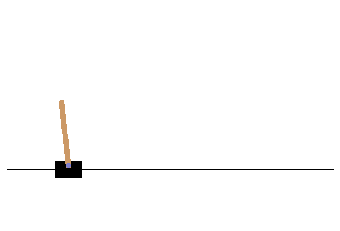

In [22]:
frames = render_policy_net("./my_policy_net_pg.ckpt", action,X, n_max_steps=1000 )
#plot_animation(frames)

# there are two ways to loose the game either the
# teh pole tilts
# or the agent goes off the screen
# now the agent is off the screen
# thats why it looses

# Markov chains

In [25]:
transition_probabilities = [
    [0.7, 0.2, 0.0,0.1],
    [0.0,0.0,0.9,0.1],
    [0.0,1.0,0.0,0.0],
    [0.0,0.0,0.0,1.0],
]

n_max_steps = 50

def print_sequence(start_state=0):
    current_state = start_state
    print("States:", end=" ")
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4), p=transition_probabilities[current_state])
    else:
        print("...",end="")
    print()

for _ in range(10):
    print_sequence()
        

States: 0 0 3 
States: 0 1 2 1 2 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 ...
States: 0 0 3 
States: 0 0 0 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 


# Markov decision process

![](trial_by_fire.png)

Markov decision for thes states given below

In [31]:
transition_probabilities = [
    [[0.7,0.3,0.0], [1.0,0.0,0.0], [0.8,0.2,0.0]],
    [[0.0,1.0,0.0], None, [0.0,0.0,1.0]],
    [None,[0.8,0.1,0.1], None],
] 

rewards = [
    [[+10,0,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[0,0,-50]],
    [[0,0,0],[+40,0,0],[0,0,0]],
]

possible_actions = [[0,1,2],[0,2],[1]]

def policy_fire(state):
    return [0,2,1][state]

def policy_random(state):
    return np.random.choice(possible_actions[state])

def policy_safe(state):
    return [0,0,1][state]

class MDPEnvironment(object):
    def __init__(self, start_state=0):
        self.start_state = start_state
        self.reset()
    def reset(self):
        self.total_rewards = 0
        self.state = self.start_state
    def step(self,action):
        next_state = np.random.choice(range(3), p=transition_probabilities[self.state][action])
        reward = rewards[self.state][action][next_state]
        self.state = next_state
        self.total_rewards += reward
        return self.state, reward
    
def run_episode(policy, n_steps,start_state=0, display=True):
    env = MDPEnvironment()
    if display:
        print("states (+rewards): ", end=" ")
    for step in range(n_steps):
        if display:
            if step == 10:
                print("...", end=" ")
            elif step < 10:
                print(env.state, end=" ")
        action = policy(env.state)
        state, reward = env.step(action)
        if display and step <10:
            if reward:
                print("({})".format(reward), end=" ")
    if display:
        print("Total rewards = ", env.total_rewards)
    return env.total_rewards

for policy in (policy_fire, policy_random,policy_safe):
    all_totals = []
    print(policy.__name__)
    for episode in range(1000):
        all_totals.append(run_episode(policy, n_steps=100, display=(episode<5)))
    print("Summary: mean={:.1f},std={:1f}, min={}, max={}".format(np.mean(all_totals), np.std(all_totals), np.min(all_totals),np.max(all_totals) ))
    print()

policy_fire
states (+rewards):  0 1 (-50) 2 2 (40) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) ... Total rewards =  100
states (+rewards):  0 1 (-50) 2 (40) 0 1 (-50) 2 (40) 0 (10) 0 1 (-50) 2 ... Total rewards =  -40
states (+rewards):  0 (10) 0 (10) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards =  80
states (+rewards):  0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards =  -100
states (+rewards):  0 1 (-50) 2 2 2 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) ... Total rewards =  420
Summary: mean=123.0,std=139.888955, min=-400, max=500

policy_random
states (+rewards):  0 1 1 1 (-50) 2 (40) 0 0 0 (10) 0 0 (10) ... Total rewards =  30
states (+rewards):  0 0 0 (10) 0 (10) 0 0 (10) 0 0 (10) 0 0 ... Total rewards =  50
states (+rewards):  0 1 (-50) 2 (40) 0 0 0 1 1 (-50) 2 (40) 0 ... Total rewards =  -130
states (+rewards):  0 0 1 1 (-50) 2 (40) 0 0 (10) 0 (10) 0 0 ... Total rewards =  -20
states (+rewards):  0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 

## Q value iteration

In [32]:
# q learning works by watching an agent play, and gradually improving its 
# estimates of the Q values, Once it has accurate Q value then the optimal policy consists in choosing the action
# that has highest Q vale greedy_policy

n_states = 3
n_actions = 3
n_steps = 20000
alpha = 0.01
gamma = 0.99
exploration_policy = policy_random
q_values = np.full((n_states, n_actions),-np.inf)
for state,actions in enumerate(possible_actions):
    q_values[state][actions]=0

env = MDPEnvironment()
for step in range(n_steps):
    action = exploration_policy(env.state)
    state = env.state
    next_state, reward = env.step(action)
    next_value = np.max(q_values[next_state])
    q_values[state, action] = (1-alpha) * q_values[state, action] + alpha *(reward + gamma * next_value)

In [33]:
def optimal_policy(state):
    return np.argmax(q_values[state])

In [34]:
q_values

array([[39.04049867, 38.57875719, 34.75451786],
       [19.15207712,        -inf, 21.1316577 ],
       [       -inf, 73.73600019,        -inf]])

In [36]:
all_totals = []
for episode in range(1000):
    all_totals.append(run_episode(optimal_policy, n_steps=100, display=(episode<5)))
print("summary: mean={:.1f}, std={:1f}, min={}, max={}".format(np.mean(all_totals), np.std(all_totals), np.min(all_totals), np.max(all_totals)))
print()

states (+rewards):  0 (10) 0 (10) 0 (10) 0 (10) 0 1 (-50) 2 2 (40) 0 (10) 0 (10) ... Total rewards =  170
states (+rewards):  0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 1 (-50) ... Total rewards =  190
states (+rewards):  0 1 (-50) 2 (40) 0 1 (-50) 2 2 (40) 0 1 (-50) 2 (40) ... Total rewards =  170
states (+rewards):  0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 1 (-50) 2 (40) ... Total rewards =  40
states (+rewards):  0 1 (-50) 2 (40) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) ... Total rewards =  250
summary: mean=120.3, std=135.001496, min=-430, max=520



Applying Q learning to the trail by fire example
![](trail_by_fire.png)


In [2]:
# we already have transition_probabilities 
# and rewards
import numpy as np

nan=np.nan # represents impossible actions
T = np.array([ # shape=[s, a, s']
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], [nan, nan, nan], [0.0, 0.0, 1.0]],
    [[nan, nan, nan], [0.8, 0.1, 0.1], [nan, nan, nan]],
])

R = np.array([ # shape=[s, a, s']
[[10., 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
[[10., 0.0, 0.0], [nan, nan, nan], [0.0, 0.0, -50.]],
[[nan, nan, nan], [40., 0.0, 0.0], [nan, nan, nan]],
])

possible_actions =[[0,1,2],[0,2],[1]]

In [56]:
# Q value iteration algorithm
Q = np.full((3,3),-np.inf)
for state, actions in enumerate(possible_actions):
    Q[state, actions] = 0.0 # initial value = 0.0. forall posssible actions

learning_rate = 0.01 
discount_rate = 0.95
n_iterations = 100

for iteration in range(n_iterations):
    Q_prev = Q.copy()
    for s in range(3):
        for a in possible_actions[s]:
                Q[s,a] = np.sum([
                    T[s,a,sp] * (R[s,a,sp] + discount_rate * np.max(Q_prev[sp]))
                    for sp in range(3)
                ])

In [55]:
#Q

# dsicount rate affects the policy being chosen
# discount .1

array([[  7.52688172,   0.75268817,   0.60215054],
       [  0.        ,         -inf, -46.70685348],
       [        -inf,  32.93146519,         -inf]])

In [57]:
Q

# discount rate 0.95

array([[21.88646117, 20.79149867, 16.854807  ],
       [ 1.10804034,        -inf,  1.16703135],
       [       -inf, 53.8607061 ,        -inf]])

## Q learning simple

In [6]:
import numpy.random as rnd

learning_rate0 = 0.05
learning_rate_decay = 0.1
n_iterations = 20000

s = 0


learning_rate = 0.01 
discount_rate = 0.95
n_iterations = 100

Q = np.full((3,3), -np.inf)

for state, actions in enumerate(possible_actions):
    Q[state, actions] = 0.0 

for iteration in range(n_iterations):
    a = rnd.choice(possible_actions[s])
    sp = rnd.choice(range(3), p=T[s,a]) # pick next state using T[s,a]
    reward = R[s,a,sp]
    learning_rate = learning_rate0/ (1+ iteration * learning_rate_decay)
    Q[s,a] = learning_rate * Q[s,a] + (1 + learning_rate) * (
        reward + discount_rate * np.max(Q[sp])
    )
    s=sp

In [7]:
Q
# given enough operations this algorithm will converge to optimal Q value

array([[ 99.01853501,  88.97008276,  64.95550041],
       [ 35.83794861,         -inf,  67.63445532],
       [        -inf, 123.32379116,         -inf]])

# DQN for MS. PacMan

In [3]:
import gym
import tensorflow as tf
import numpy as np


In [4]:
# creating he pacman environemnt
env = gym.make("MsPacman-v0")
obs = env.reset()
obs.shape

(210, 160, 3)

In [4]:
env.action_space

Discrete(9)

### Preprocessing

In [5]:
#It greatly sppeds up trainign
mspacman_color = 210 + 164 + 74

def preprocess_observation(obs):
    img = obs[1:176:2, ::2] # crop and downsize
    img = img.sum(axis=2) # to greyscale
    img[img == mspacman_color] = 0 # improve contrast
    img = (img // 3 - 128).astype(np.int8) # normalise from -128 to 128
    return img.reshape(88, 80, 1)

img = preprocess_observation(obs)

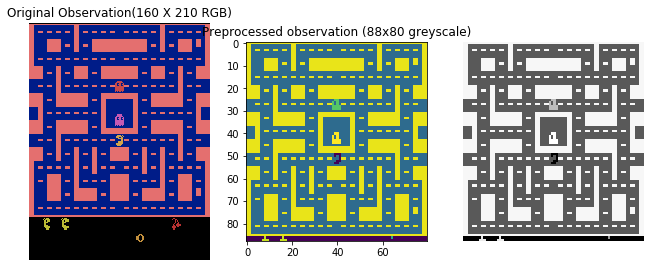

In [19]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(11,7))
plt.subplot(131)
plt.title("Original Observation(160 X 210 RGB)")
plt.imshow(obs)
plt.axis("off")
plt.subplot(132)
plt.title("Preprocessed observation (88x80 greyscale)")
plt.imshow(preprocess_observation(obs).reshape(88,80))
plt.subplot(133)
plt.imshow(img.reshape(88,80), interpolation="nearest",cmap="gray")
plt.axis("off")
plt.show()

In [6]:
## Build the DQN
# the training algorithm uses two DQNs with the same architecture but different
#parameters one to drive Ms Pac man during the training the online
# and other will watch the actor from its trials , the target

tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

input_height = 88
input_width = 80
input_channels = 1
conv_n_maps = [32,64,64]
conv_kernel_size = [(8,8), (4,4), (3,3)]
conv_strides = [4,2,1]
conv_paddings = ["SAME"] * 3
conv_activation = [tf.nn.relu] * 3
#multiply by three because a zip has been used to encapsulate the values

n_hidden_in  = 64 * 11* 10 # conv3 has 64 maps of 11x10 each
n_hidden = 512
hidden_activation = tf.nn.relu
n_outputs = env.action_space.n # 9 discrete actions are available
initializer = tf.variance_scaling_initializer()
# this defines the hyperparameters

# The DQn takes the X_state as input and name of the variable scope
def q_network(X_state, name):
    prev_layer = X_state / 128.0 # scale pixel intensities to the [-1.0,1.0]
    with tf.variable_scope(name) as scope:
        for n_maps, kernel_size, strides, padding,activation in zip(
                conv_n_maps,conv_kernel_size, conv_strides,
                conv_paddings, conv_activation):
            prev_layer = tf.layers.conv2d(
                prev_layer, filters=n_maps, kernel_size=kernel_size,
                strides = strides, padding=padding, activation=activation,
                kernel_initializer=initializer
            )
            # why are we not appending the prev layers
            # prev layer only stands for the alst layer here
            
        last_conv_layer_flat = tf.reshape(prev_layer, shape=[-1,n_hidden_in])
        hidden = tf.layers.dense(last_conv_layer_flat, n_hidden,activation=hidden_activation, kernel_initializer=initializer)
        outputs = tf.layers.dense(hidden, n_outputs, kernel_initializer=initializer)
    
    trainable_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                      scope=scope.name)
    trainable_vars_by_name = {var.name[len(scope.name):]: var 
                             for var in trainable_vars}
    return outputs, trainable_vars_by_name

In [7]:
X_state = tf.placeholder(tf.float32, shape=[None, input_height, input_width, input_channels])
online_q_values, online_vars = q_network(X_state, name="q_networks/online")
target_q_values, target_vars = q_network(X_state, name="q_networks/target")
# defining two DQNs

copy_ops = [target_var.assign(online_vars[var_name])
            for var_name, target_var in target_vars.items()]

copy_online_to_target = tf.group(*copy_ops)
# this operation is supposed to copy yhr online network to target network but why

W0629 06:26:09.426785  8912 deprecation.py:323] From <ipython-input-6-ef1cea899b99>:37: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0629 06:26:09.429777  8912 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow_core\python\layers\convolutional.py:424: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
W0629 06:26:09.545496  8912 deprecation.py:323] From <ipython-input-6-ef1cea899b99>:43: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.Dense instead.


In [8]:
online_vars
# trainable var by name

{'/conv2d/kernel:0': <tf.Variable 'q_networks/online/conv2d/kernel:0' shape=(8, 8, 1, 32) dtype=float32_ref>,
 '/conv2d/bias:0': <tf.Variable 'q_networks/online/conv2d/bias:0' shape=(32,) dtype=float32_ref>,
 '/conv2d_1/kernel:0': <tf.Variable 'q_networks/online/conv2d_1/kernel:0' shape=(4, 4, 32, 64) dtype=float32_ref>,
 '/conv2d_1/bias:0': <tf.Variable 'q_networks/online/conv2d_1/bias:0' shape=(64,) dtype=float32_ref>,
 '/conv2d_2/kernel:0': <tf.Variable 'q_networks/online/conv2d_2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 '/conv2d_2/bias:0': <tf.Variable 'q_networks/online/conv2d_2/bias:0' shape=(64,) dtype=float32_ref>,
 '/dense/kernel:0': <tf.Variable 'q_networks/online/dense/kernel:0' shape=(7040, 512) dtype=float32_ref>,
 '/dense/bias:0': <tf.Variable 'q_networks/online/dense/bias:0' shape=(512,) dtype=float32_ref>,
 '/dense_1/kernel:0': <tf.Variable 'q_networks/online/dense_1/kernel:0' shape=(512, 9) dtype=float32_ref>,
 '/dense_1/bias:0': <tf.Variable 'q_networks/onl

In [9]:
learning_rate = 0.001
momentum =0.95

with tf.variable_scope("train"):
    X_action = tf.placeholder(tf.int32, shape=[None])
    y = tf.placeholder(tf.float32, shape=[None, 1])
    
    # this will zero out all Q values except forth eone corresponding to the 
    # memorized action.Then we just sum overthe first axis to obtain the desired 
    # Q value prediction for each memory
    q_value = tf.reduce_sum(online_q_values * tf.one_hot(X_action, n_outputs),
                            axis=1, keepdims=True)
    error = tf.abs(y-q_value)
    clipped_error = tf.clip_by_value(error, 0.0,1.0)
    linear_error = 2 * (error -clipped_error)
    # more like a quadratic error function
    loss= tf.reduce_mean(tf.square(clipped_error) + linear_error)
    """
    Note: in the first version of the book, the loss function was simply the squared error 
    between the target Q-Values (y) and the estimated Q-Values (q_value). 
    However, because the experiences are very noisy, 
    it is better to use a quadratic loss only for small errors (below 1.0) 
    and a linear loss (twice the absolute error) for larger errors,
    which is what the code above computes. 
    This way large errors don't push the model parameters around as much. 
    """
    
    global_step = tf.Variable(0, trainable=False, name='global_step')
    optimizer = tf.train.MomentumOptimizer (learning_rate, momentum, use_nesterov=True)
    training_op = optimizer.minimize(loss, global_step=global_step)
    # gloabl step initialised to 0
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

W0629 06:26:22.306785  8912 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# we use a replay memory than a deque because it is much faster for random acces
# we default to sampling with replacement

class ReplayMemory:
    def __init__(self, maxlen):
        self.maxlen = maxlen
        self.buf = np.empty(shape=maxlen, dtype=np.object)
        self.index = 0 
        self.length = 0
        
    def append(self, data):
        self.buf[self.index] = data
        self.length = min(self.length + 1, self.maxlen)
        self.index = (self.index + 1) % self.maxlen
    
    def sample(self, batch_size, with_replacement=True):
        if with_replacement:
            indices = np.random.randint(self.length, size=batch_size)
        else:
            indices = np.random.permutation(self.length)[:batch_size]
        return self.buf[indices]

# this stores data (defined in sample memory) in buffer to be sampled and returned when required

In [11]:
replay_memory_size =500000
replay_memory = ReplayMemory(replay_memory_size)
# initalising replay _memory object


In [12]:
def sample_memories(batch_size):
    cols = [[],[],[],[],[]]
    # state, action, reward, next_state, contine
    for memory in replay_memory.sample(batch_size):
        for col, value in zip(cols, memory):
            col.append(value)
    
    cols = [np.array(col) for col in cols]
    return cols[0], cols[1], cols[2].reshape(-1,1), cols[3], cols[4].reshape(-1,1)

# wraooer function for replay memory and we also realise that
# teh data is state, action, reward, next_stae and continue

In [13]:
eps_min = 0.1
eps_max = 1.0
eps_decay_steps = 2000000

#will gradually decrease from 1.0 to 0.1 in 20000000 steps
def epsilon_greedy(q_values, step):
    epsilon = max(eps_min, eps_max - (eps_max - eps_min) * step/eps_decay_steps)
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        return np.argmax(q_values)
    
    # the function that chooses the greedy action it 
    # choose the best value argmax(q_value) if the cahnce desires it

In [14]:
n_steps = 4000000 # total training steps
training_start = 10000 # start training after 10,000 iterations
training_interval = 4 # run a training step every 4 iterations
save_steps = 1000 # save model every 1000 steps
copy_steps = 10000 # copy online DQN to target DQN every 10,000 training steps
discount_rate =0.99 
skip_start = 90 # skip the start of every game when it is just waiting
batch_size = 50
iteration = 0 # GAMEiterations
checkpoint_path = "./my_dqn.ckpt"
done = True # env needs to reset


In [15]:
# variables to track the progress

loss_val = np.infty
game_length = 0
total_max_q = 0
mean_max_q = 0.0

In [ ]:
# The main traiing loop
import os

with tf.Session() as sess:
    if os.path.isfile(checkpoint_path + ".index"):
        saver.restore(sess, checkpoint_path)
    else:
        init.run()
        copy_online_to_target.run()
    while True:
        step = global_step.eval()
        if step >= n_steps:
            break
        iteration += 1
        print("\rIteration {}\tTraining step {}/{} ({:.1f})%\tLoss {:5f}\tMean Max-Q {:5f} ".format(
            iteration, step, n_steps, step * 100 / n_steps, loss_val, mean_max_q
        ), end="")
        
        if done: # it means game over, start again
            obs = env.reset()
            for skip in range(skip_start):
                # skip to the start of each game
                obs, reward, done, info = env.step(0)
            state = preprocess_observation(obs)
        
        # online DQn evaluates what to do
        q_values = online_q_values.eval(feed_dict={X_state: [state]})
        action = epsilon_greedy(q_values, step)
        # action can be argmax(Q) or some random value
        
        # online DQn evaluates what to do
        obs, reward, done, info = env.step(action)
        next_state = preprocess_observation(obs)
        
        # lets memorize what happened
        replay_memory.append((state, action, reward, next_state, 1.0- done))
        state = next_state
        
        # compute statistics for tracking progress
        total_max_q += q_values.max()
        game_length += 1
        if done:
            mean_max_q = total_max_q /game_length
            total_max_q = 0.0
            game_length = 0
        
        if iteration < training_start or iteration % training_interval != 0:
            continue # only train after warmup period and atregular intervals
        
        # sample memories and use the target DQN to produce the target Q-value
        X_state_val, X_action_val, rewards, X_next_state_val,continues = (
            sample_memories(batch_size))
        next_q_values = target_q_values.eval(
            feed_dict ={X_state:X_next_state_val}
        )
        max_next_q_values = np.max(next_q_values, axis=1, keepdims=True)
        y_val = rewards + continues * discount_rate * max_next_q_values
        # The only tricky part here is that we must multiply the next state’s Q-Values by the
        # continues vector to zero out the Q-Values corresponding to memories where the
        # game was over.
        
        # train teh online SQn
        _, loss_val = sess.run([training_op, loss], feed_dict={
            X_state: X_state_val, X_action:X_action_val, y:y_val
        })
        
        # regularly copy the DQN to target DQn
        if step %copy_steps == 0:
            copy_online_to_target.run()
            
        # save regularly
        if step% save_steps == 0:
            saver.save(sess, checkpoint_path)
            

Iteration 658089	Training step 242024/4000000 (6.1)%	Loss 2.048075	Mean Max-Q 11.415875  

In [62]:
# testing the agent
frames = []
n_max_steps = 10000

with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)
    
    obs = env.reset()
    for step in range(n_max_steps):
        state = preprocess_observation(obs)
        
        # online DWn evluates what to do
        q_values = online_q_values.eval(feed_dict={X_state:[state]})
        action = np.argmax(q_values)
        
        #online dqn plays
        obs, reward, done,info = env.step(action)
        
        img = env.render(mode="rgb_array")
        frames.append(img)
        
        if done:
            break

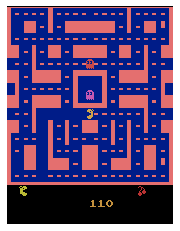

In [ ]:
# at 9865
# plot_animation(frames)